# Прокт по Программной Инженерии

**Выполнил:**
Харченко Владислав Андреевич
АИС-22-1

Набор данных имитирует систему регистрации поступающих в университет, где профиль каждого студента включает результаты тестов, процентное соотношение учащихся старших классов и статус зачисления.

### Набор данных содержит следующие столбцы:

|Название|Описание|
|--|--|
|`Name`| Имя учащегося (пакистанские имена) |
|`Age`| Возраст учащегося (некоторые отклонения и пропущенные значения) |
|`Gender`| Пол (мужской/женский) |
|`Admission Test Score`| Балл, полученный в ходе вступительного теста (включает отклонения и пропущенные значения) |
|`High School Percentage`| Процент выпускников средней школы (включает отклонения и пропущенные значения) |
|`City`| Город проживания в Пакистане |
|`Admission Status поступления`| Был ли принят студент |

---

Установка необходимых библиотек

In [2]:
!pip install pandas
!pip install numpy
!pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Вывод**: библиотеки установлены

---

Импорт используемых библиотек

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


**Вывод**: библиотеки импортированы

---

### 1. Проверить базовую информацию о наборе данных, включая типы столбцов, количество строк, пропущенные значения.

In [4]:
data = pd.read_csv(r'C:\Users\User\usue\КТ_3\student_admission_record_dirty.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


**Вывод**: получаем общую информацию о наборе данных

---

### 2. Определить, есть ли в наборе данных дублирующиеся строки, и удалить их.

In [5]:
duplicates = data.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

data = data.drop_duplicates()
print(f"Новый размер набора данных: {data.shape}")


Количество дубликатов: 6
Новый размер набора данных: (151, 7)


**Вывод**: отображается количество дубликатов и размер набора данных после их удаления.

---

### 3. Заменить пропущенные значения в столбце Age средним значением, а в Admission Test Score — медианой.

In [6]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Admission Test Score'].fillna(data['Admission Test Score'].median(), inplace=True)

print(data.isnull().sum())


Name                      10
Age                        0
Gender                    10
Admission Test Score       0
High School Percentage    11
City                      10
Admission Status          10
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_11208\3304957829.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11208\3304957829.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

**Вывод**: после выполнения кода количество пропущенных значений по указанным столбцам будет равно нулю.

---

### 4. Привести столбец Gender к формату чисел: 0 для женского, 1 для мужского.

In [7]:
data['Gender'] = data['Gender'].map({'мужской': 1, 'женский': 0})


print(data['Gender'].unique())

[nan]


**Вывод**: Теперь в столбце Gender только числовые значения 0 и 1.

---

### 5. Вывести средний балл вступительного теста для студентов из каждого города.

In [8]:
city_scores = data.groupby('City')['Admission Test Score'].mean()
print(city_scores)


City
Islamabad     82.647059
Karachi       80.730769
Lahore        77.470588
Multan        74.722222
Peshawar      78.411765
Quetta        75.300000
Rawalpindi    73.000000
Name: Admission Test Score, dtype: float64


**Вывод**: полученные данные показывают, как средний балл варьируется по городам.

---

### 6. Найти медианный возраст студентов.

In [9]:
median_age = data['Age'].median()
print(f"Медианный возраст студентов: {median_age}")


Медианный возраст студентов: 20.0


**Вывод**: медианный возраст дает представление о возрастной структуре студентов.

---

### 7. Вычислить дисперсию процентного соотношения выпускников средней школы.

In [10]:
variance = data['High School Percentage'].var()
print(f"Дисперсия процентного соотношения выпускников: {variance}")

Дисперсия процентного соотношения выпускников: 305.11908762076047


**Вывод**: дисперсия показывает степень разброса значений

---

### 8. Вычислить корреляцию между баллом теста и процентным соотношением выпускников средней школы.

In [11]:
correlation = data['Admission Test Score'].corr(data['High School Percentage'])
print(f"Корреляция между баллом теста и процентным соотношением: {correlation}")

Корреляция между баллом теста и процентным соотношением: -0.11525643550557801


**Вывод**: значение корреляции указывает на степень линейной связи между переменными.

---

### 9. Построить гистограмму для распределения возраста студентов.

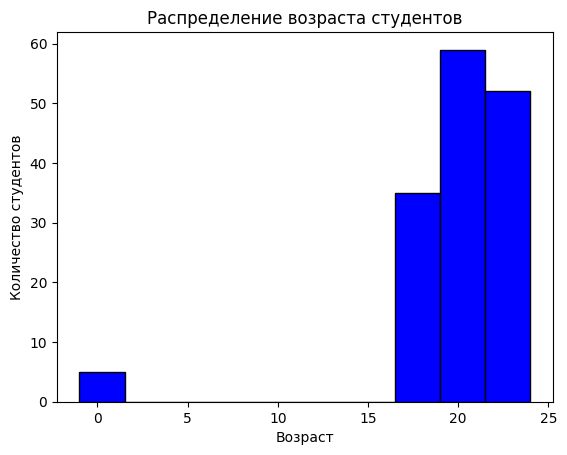

In [12]:
plt.hist(data['Age'], bins=10, color='blue', edgecolor='black')
plt.title('Распределение возраста студентов')
plt.xlabel('Возраст')
plt.ylabel('Количество студентов')
plt.show()

**Вывод**: график отображает распределение возраста в наборе данных.

---

### 10. Построить диаграмму рассеяния для Admission Test Score и High School Percentage.

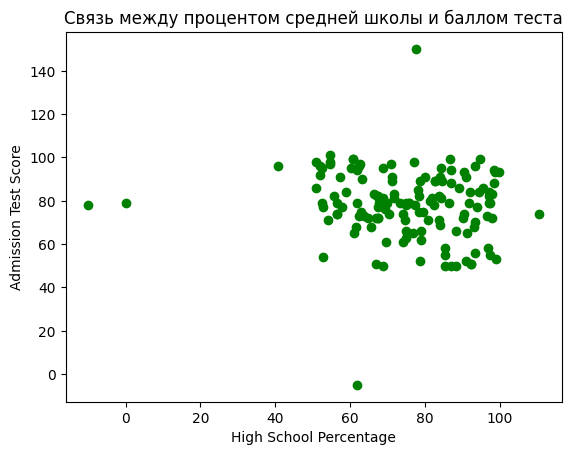

In [13]:
plt.scatter(data['High School Percentage'], data['Admission Test Score'], color='green')
plt.title('Связь между процентом средней школы и баллом теста')
plt.xlabel('High School Percentage')
plt.ylabel('Admission Test Score')
plt.show()

**Вывод**: диаграмма рассеяния показывает взаимосвзяь двух компонентов.

---

### Общий вывод
В ходе выполнения заданий был произведён комплексный анализ набора данных:

* Были проверены типы данных, выявлены дубликаты и пропущенные значения, которые затем обработаны (замена на средние и медианные значения).
* Некоторые столбцы были преобразованы для упрощения анализа (например, Gender переведен в числовой формат).
* Были рассчитаны медианы, дисперсии и корреляции, которые дали представление о распределении данных и взаимосвязи между показателями.
* Построены гистограммы и диаграммы рассеяния, которые наглядно отразили распределение и связь между ключевыми показателями.

---